In [4]:
import numpy as np
import scipy.constants as ct
import random
import matplotlib.pyplot as plt

import json

In [5]:
k = np.linspace(-10,-0.002,500)
tau = np.linspace(0,1,500)

#unit = 1e-21 


In [6]:
def bose_dist(x):

    T = 273
    #boltz = ct.k*T

    return 1/(np.exp(x)-1)

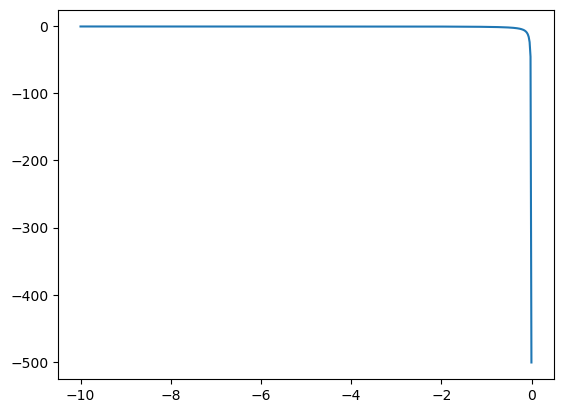

In [7]:

plt.plot(k,bose_dist(k))
plt.show()

In [8]:
def green(tau,k):

    #for i in range(len(tau)):
        #if tau[i] > 0:
            #return (bose_dist(k)+1)*np.exp(-k*tau)
        #if tau[i] < 0:
            #return (bose_dist(k))*np.exp(-k*tau)
        return ((bose_dist(k)+1)*np.exp(-k*tau)) + (bose_dist(k))*np.exp(k*tau)

In [21]:
def omega(v):
    return v*np.abs(k)

def coupling(v,g,W):
    w = omega(v)
    cut_off = W
    return g*np.sqrt(w/(1+(w/cut_off)**2))

def interact(tau):

    file_path = "./data.json"

    with open(file_path, 'r') as file:
        data = json.load(file)
    
    v = data['v']
    g = data['g']
    W = data['W']

    g_k = np.abs(coupling(v,g,W))**2

    n = len(k)

    k_sum = np.zeros(n)
    t_array = np.zeros(n)

    for j in range(n):
        t = tau[j]
        for i in range(n):
            k_sum[i] = g_k[i] * green(t,k)[i]
        t_array[j] = np.sum(k_sum)
        k_sum = np.zeros(len(k))
    
    #print(t_array)
    return t_array


In [22]:
def approx(tau,k):
    return (-k*tau + (np.exp(k)+1)/(np.exp(k)-1))*coupling(2,0.2,10)**2

arr=np.zeros(len(k))
arr2=np.zeros(len(k))

for j in range(len(k)):
    t=tau[j]
    for i in range(len(tau)):
        arr[i]=approx(t,k)[i]
    arr2[j]=np.sum(arr)
    arr=np.zeros(len(k))

    def func2(x):
        return 1/(x)

    def func(x):
        return 1/(x**2)

-22.840293356876337


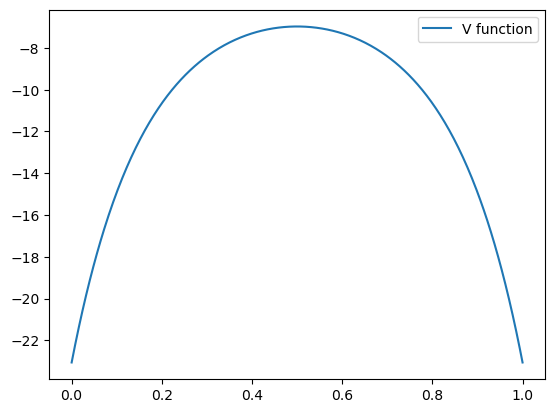

In [27]:
print(interact(tau)[1])
plt.plot(tau,interact(tau),label='V function')
#plt.plot(tau,arr2,label='approx')
#plt.plot(tau,func2(tau),label=r'$1/\tau$')
#plt.plot(tau,func(tau),label=r'$1/\tau^2$')

#plt.xscale('log')
#plt.yscale('log')

plt.xlabel=('tau')
plt.ylabel=('V(tau)')

plt.legend()
plt.show()

In [ ]:
output(tau)